3.1介绍
数据预处理是任何数据分析问题的关键步骤。
    以这样的方式准备数据通常是一个非常好的主意，以便最好地将问题的结构暴露给您打算使用的机器学习算法。这涉及一些活动，例如:
    1.为分类数据赋值;
    2.处理缺失值;
    3.将特征归一化(以便在将模型拟合到数据时，小尺度上的特征不会占主导地位)。
    在NotebookEDA数据探索性分析中。我研究了这些数据，以帮助深入了解数据的分布以及属性之间是如何相互关联的。
我确定了一些有趣的特征。在这个Notebook中，我使用特征选择来降维高维数据，使用特征提取和变换来降维。
目标:
    1.找到数据中最具预测性的特征并对其进行过滤，从而增强分析模型的预测能力。
    2.加载数据和必要的库

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#加载库进行数据处理
import pandas as pd 
import numpy as np
from scipy.stats import norm

#可视化
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 

data = pd.read_csv('data/data.csv', index_col=False)

在这里，我将30个特征分配给NumPy数组X，并将类标签从原始字符串表示(M和B)转换为整数

In [2]:
#为narray(矩阵)类型的变量分配预测器
X = data.iloc[:,2:32]
y = data.iloc[:,1].apply(lambda x: 1 if x == "M" else 0)


在数组y中编码了类标签(诊断)之后，恶性肿瘤现在被表示为1类(癌细胞的出现M)),良性肿瘤分别表示为O类(即未检测到癌细胞B)

3.2评估模型准确性:将数据分成训练集和测试集
    评估机器学习算法性能的最简单方法是使用不同的训练和测试数据集。在这里
    1.将可用数据分成训练集和测试集， (70%培训，30%测试)
    2.在第一部分训练算法，对第二部分进行预测根据预期结果评估预测。
    3.分割的大小可以取决于数据集的大小和具体情况，尽管通常使用67%的数据用于训练，剩余33%用于测试。

In [3]:
from sklearn.model_selection import train_test_split

#将训练数据分成70%，测试数据分成30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

3.3特征标准化
    标准化是将具有高斯分布和不同均值和标准差的属性转换为均值为0和标准差为1的标准高斯分布的有用技术。
    正如在NotebookEDA数据探索性分析中所看到的，原始数据具有不同的分布，这可能对大多数ML算法产生影响。如果特征处于相同的规模，大多数机器学习和优化算法都会表现得更好。
    让我们用数据集的标准化副本来评估相同的算法。这里，我使用sklearn缩放和转换数据，使每个属性的平均值为0，标准差为1

In [4]:
from sklearn.preprocessing import StandardScaler

#规范化数据(以0为中心并缩放以消除方差)。
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

3.4基于主成分分析的特征分解
    从NotebookEDA数据探索性分析中的对图来看，许多特征对将数据划分得很好，程度相似，因此，在仅处理2维时，使用其中一种降维方法来尝试使用尽可能多的特征并维护尽可能多的信息是有意义的。我将使用PCA

In [5]:
from sklearn.decomposition import PCA
#特征提取
pca = PCA(n_components=10)
fit = pca.fit(Xs)

#总结组件
#print("Explained Variance: %s") 
#print(fit.components_)

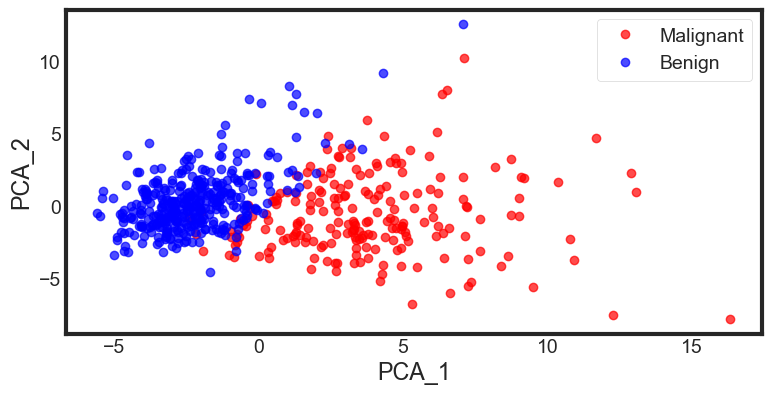

In [6]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

现在，我们在应用线性PCA变换后得到的是一个较低维的子空间(在这种情况下从3D到2D)，样本在其中“大多数分布”在新的特征轴上。

In [7]:
#每个PC解释的差异量
var= pca.explained_variance_ratio_
#累积方差解释
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


3.5决定保留多少主成分
为了决定应该保留多少主成分，通常通过制作屏幕图来总结主成分分析的结果。

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


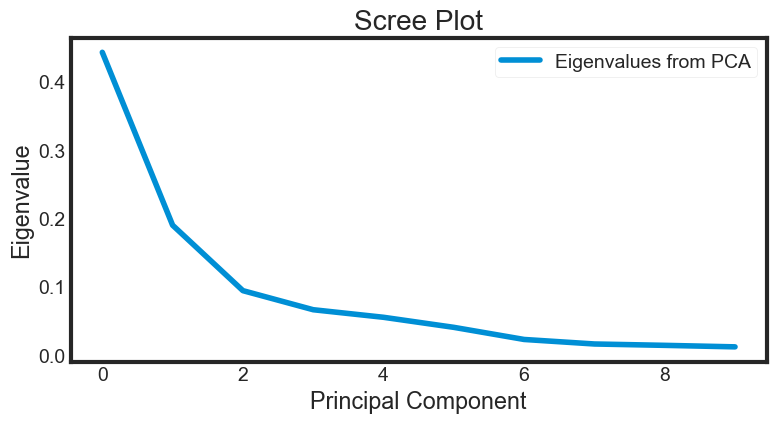

In [8]:
#每个PC解释的差异量
var= pca.explained_variance_ratio_
#累积方差解释
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

观察最明显的坡度变化发生在分量2处，即“弯头”。
因此，根据屏幕图的基础，可以认为前三个部分应该保留。

   这里使用的数据预处理方法摘要:
1.将特征分配给NumPy数组X，并将类标签从原始字符串表示(M和B)转换为整数
2.将数据分成训练集和测试集
3.标准化数据。
4.从协方差矩阵或相关矩阵中获得特征向量和特征值
5.对特征值按降序排序，选择对应于kk个最大特征值的kk个特征向量，其中k是新特征子空间(k<=dk<=d)的维数。
6.从选定的k个特征向量构造投影矩阵W。
7.对原始数据集X进行W变换，得到k维特征子空间Y。
   通常选择与类标签有最大相关性的特征子集。
   特征选择的效果必须在一个完整的建模管道中进行评估，以便给你一个对模型真实性能的无偏估计。因此，了解交叉验证，然后在模型构建管道中应用基于pca的特征选择策略。